# Hamiltonian Monte Carlo

## - Log de la función objetivo

Esta función objetivo es la suma de dos distribuciones normales con valores medios $\mu_1 = m1$, $\mu_1 = m2$ y desviaciones estandar $\sigma_1 = sigma1$, $\sigma_2 = sigma2$, respectivamente.

In [98]:
mu1 = 5
sigma1 = 1

mu2 = 0
sigma2 = 1

neg_log_funtion = function(x){
  return(-log(0.5*dnorm(x, mean=mu1, sd= sigma1)+ 0.5*dnorm(x, mean=mu2, sd = sigma2)))
}

Ejecutar la siguiente linea para la distribución normal 

In [85]:
mu1 = 5
sigma1 = 1


neg_log_funtion = function(x){
  return(-log(dnorm(x, mean=mu1, sd= sigma1)))
}

## Derivada de -log funcion objetivo

In [99]:
dVdQ = function(q0){
  f = expression(-log(0.5*(1/(sqrt(2*pi)*sigma1))*exp(-0.5*((x-mu1)/sigma1)^2)+0.5*(1/(sqrt(2*pi)*sigma2))*exp(-0.5*((x-mu2)/sigma2)^2)))
  fprima<- D(f,"x")
  return(eval(fprima,envir=list(x=q0)))
}

Ejecutar la siguiente linea si requiere la función normal

In [87]:
dVdQ = function(q0){
  f = expression(-log((1/(sqrt(2*pi)*sigma1))*exp(-0.5*((x-mu1)/sigma1)^2)))
  fprima<- D(f,"x")
  return(eval(fprima,envir=list(x=q0)))
}

## Condiciones iniciales 

In [100]:
path_len = 1
step_size = 0.25
#step = integer(path_len/step_size)
iter = 10000
q = rep(0,iter)
q[1] = -15
q0 = q[1]
cont = 0

## Algoritmo

In [106]:
for(i in 1:(iter-1)){
  q0 = q[i]
  q1 = q0
  p0 = rnorm(1)
  p1 = p0
  dVdQ_eval = dVdQ(q0)
  
  for(j in 0:step_size:path_len){
    p1 = p1 - step_size*dVdQ_eval/2
    q1 = q1 + step_size*p1 
    p1 = p1 - step_size*dVdQ_eval/2
  }
  p1 = -1*p1
  
  target_diff = neg_log_funtion(q0) - neg_log_funtion(q1)
  correction = log(dnorm(p1))-log(dnorm(p0))
  acceptance = target_diff + correction

   if(log(runif(1))<acceptance){
    q[i+1] = q1       
    cont = cont + 1} 
  else {
    q[i+1] = q0
  }
}

## Gráficas Función Suma de Normales

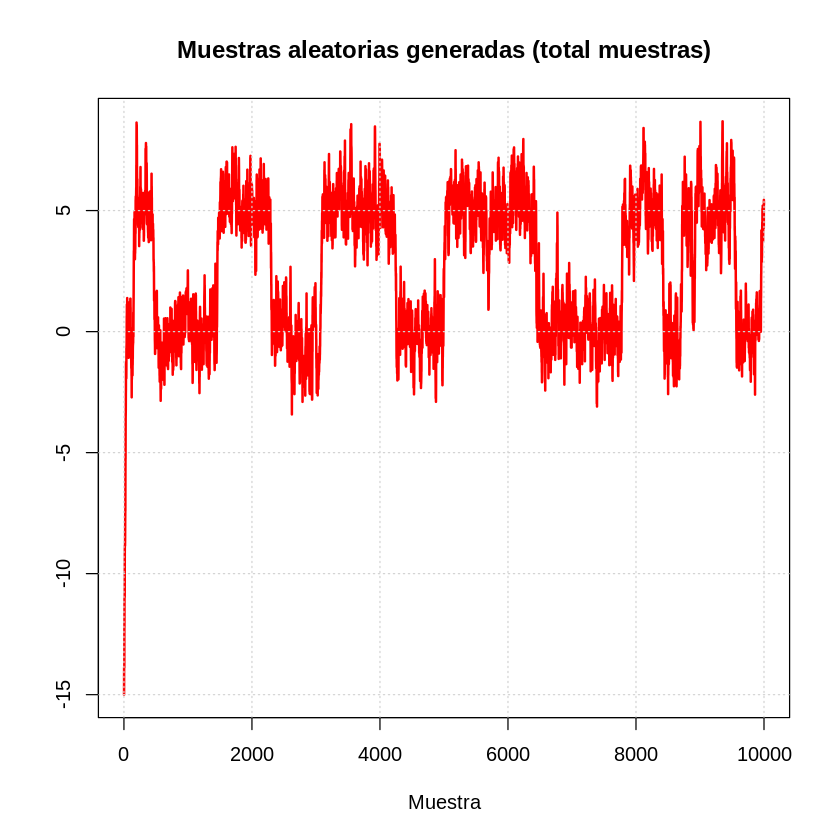

In [107]:
plot(q, main='Muestras aleatorias generadas (total muestras)', ylab='', xlab='Muestra', type="l", col='red', lwd=2) 
grid()

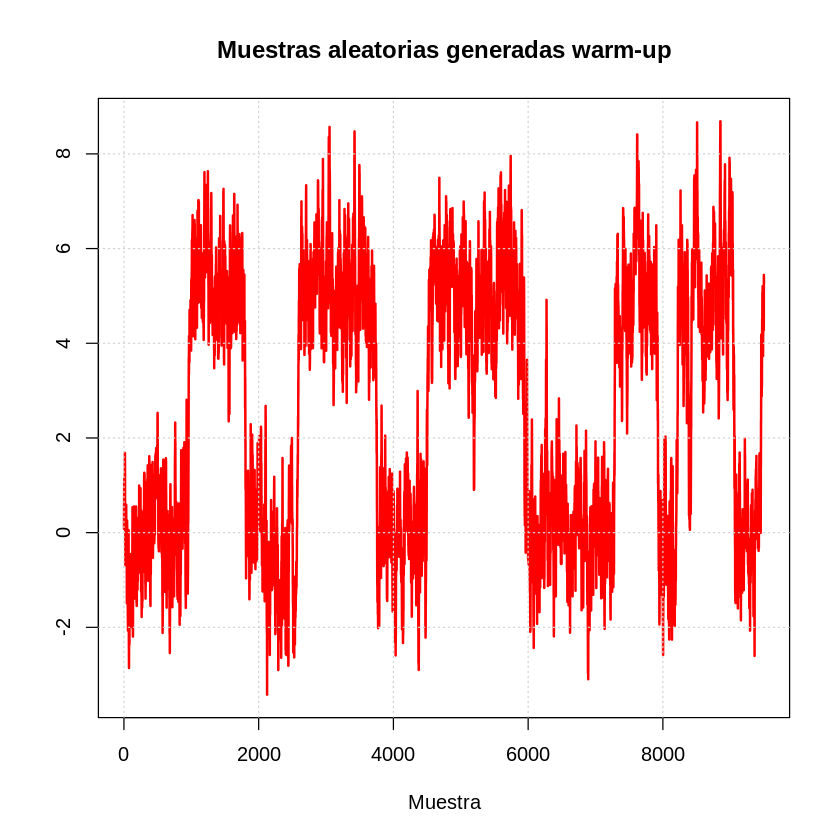

In [108]:
iter_warm_up = 500
plot(q[iter_warm_up:iter], main='Muestras aleatorias generadas warm-up', ylab='', xlab='Muestra',type="l", col='red', lwd=2) 
grid()

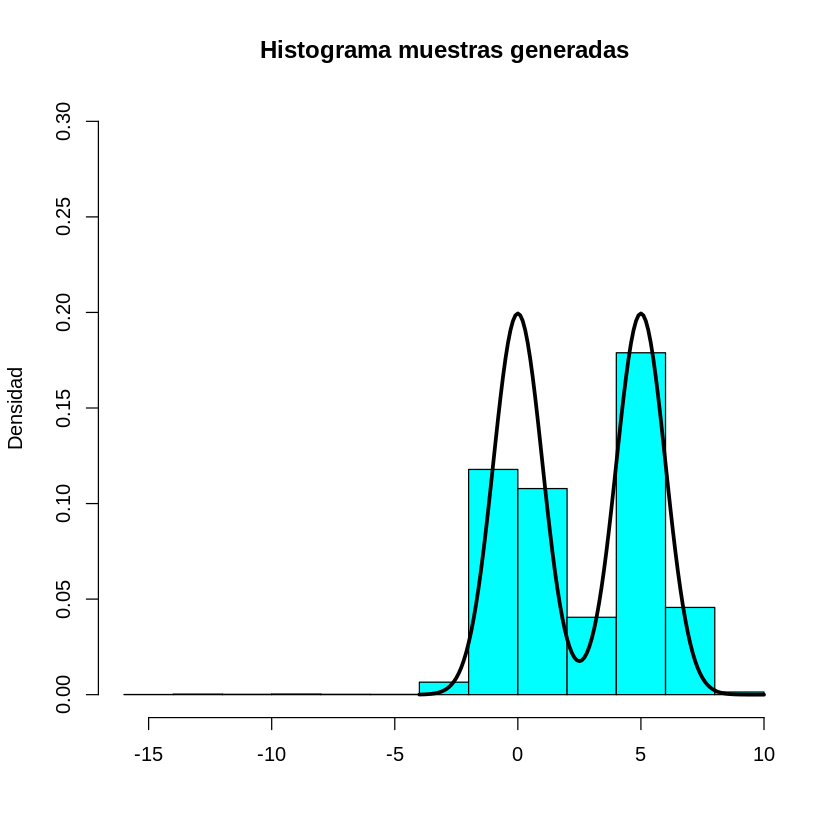

In [109]:
x <- seq(-4, 10, 0.1)
y1 <- 0.5*dnorm(x, mean=mu1, sd= sigma1) 
y2 <- 0.5*dnorm(x, mean=mu2, sd = sigma2)
y <- y1+y2
hist(q,freq=FALSE, col="cyan",ylim=c(0,0.3),
     main="Histograma muestras generadas",xlab="",ylab="Densidad")
     lines(x,y,lw=3, ylim=c(0,1))

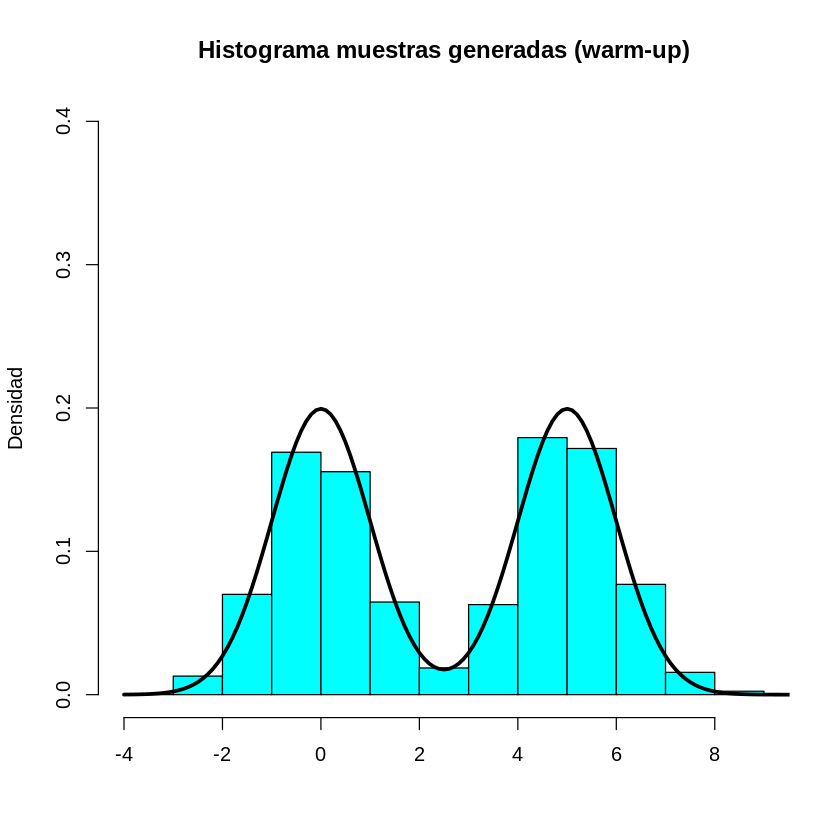

In [110]:
x <- seq(-4, 10, 0.1)
y1 <- 0.5*dnorm(x, mean=mu1, sd= sigma1) 
y2 <- 0.5*dnorm(x, mean=mu2, sd = sigma2)
y <- y1+y2
hist(q[iter_warm_up:iter],freq=FALSE, col="cyan",ylim=c(0,0.4),
     main="Histograma muestras generadas (warm-up)",xlab="",ylab="Densidad")
     lines(x,y,lw=3, ylim=c(0,1))

##  Gráficas funcion normal

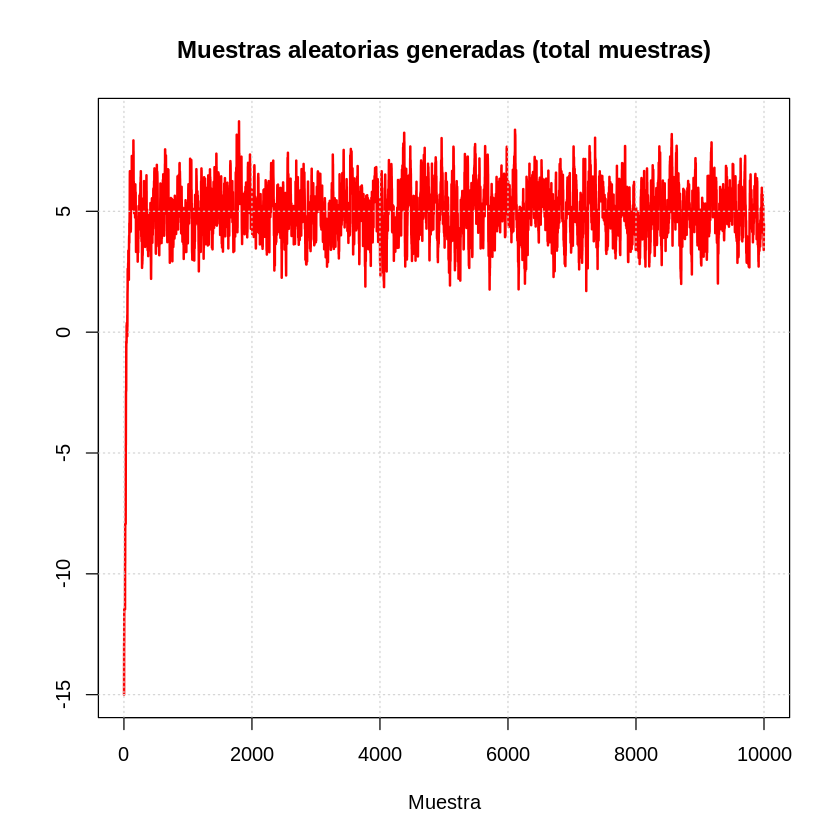

In [93]:
plot(q, main='Muestras aleatorias generadas (total muestras)', ylab='', xlab='Muestra', type="l", col='red', lwd=2) 
grid()

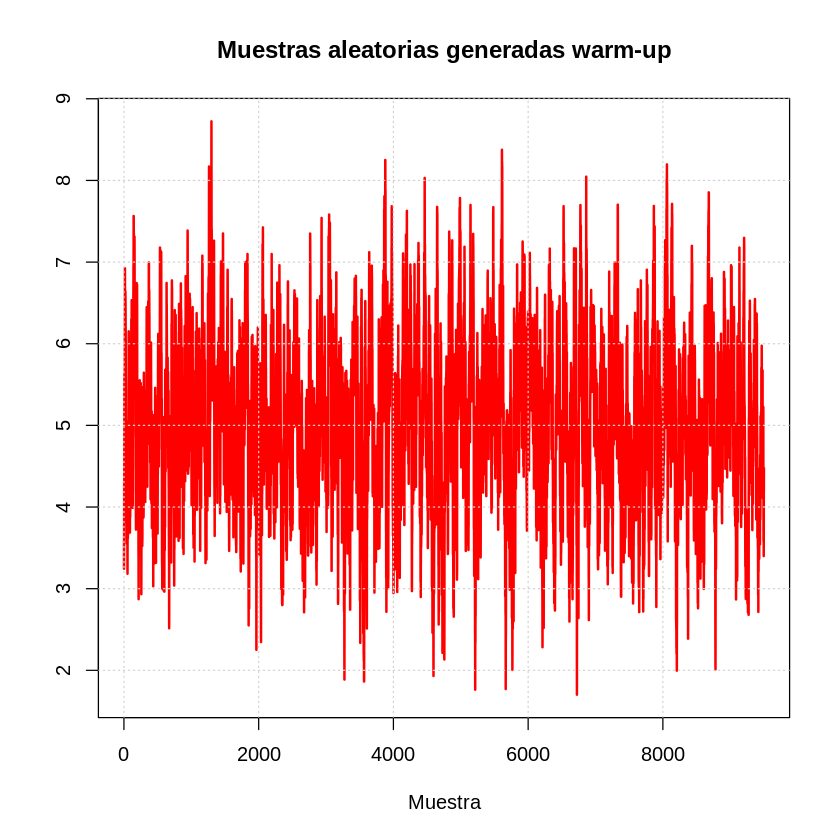

In [94]:
iter_warm_up = 500
plot(q[iter_warm_up:iter], main='Muestras aleatorias generadas warm-up', ylab='', xlab='Muestra',type="l", col='red', lwd=2) 
grid()

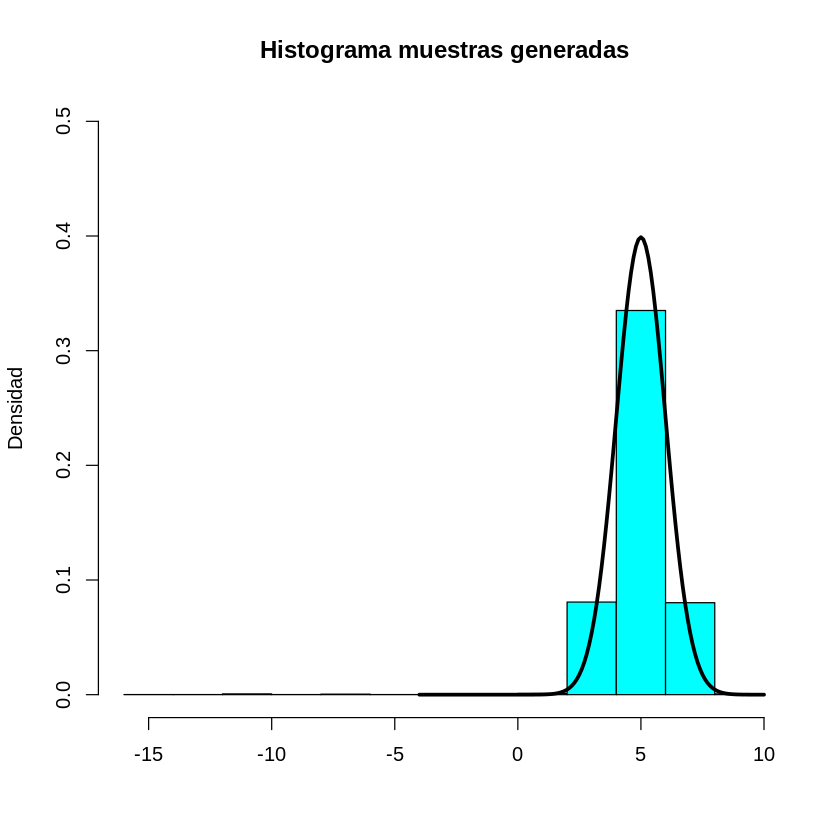

In [96]:
x <- seq(-4, 10, 0.1)
y <- dnorm(x, mean=mu1, sd= sigma1) 

hist(q,freq=FALSE, col="cyan",ylim=c(0,0.5),
     main="Histograma muestras generadas",xlab="",ylab="Densidad")
     lines(x,y,lw=3, ylim=c(0,1))

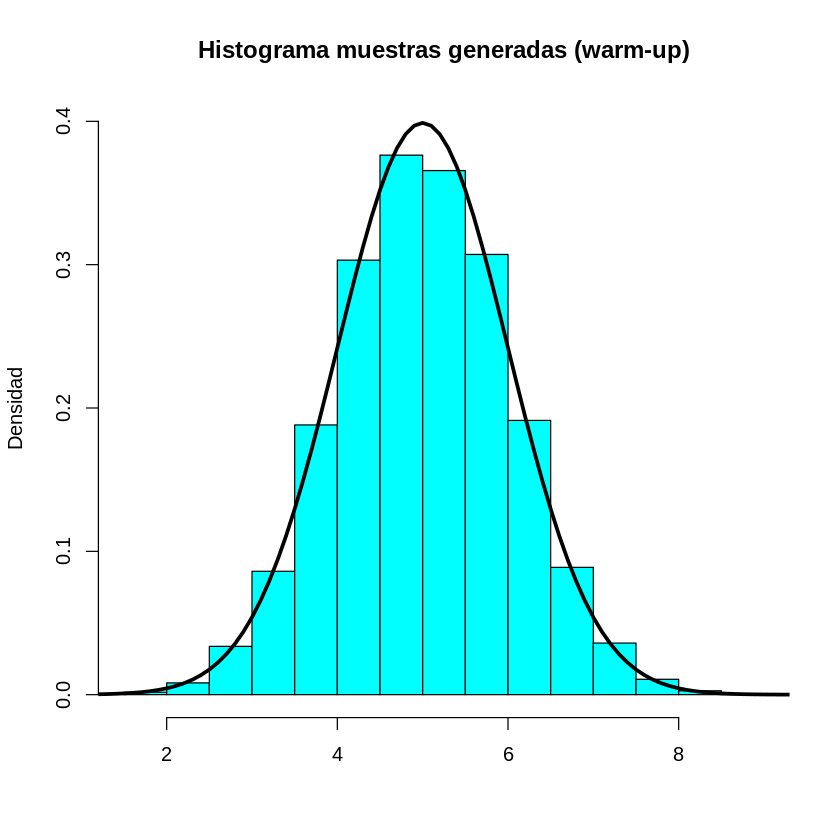

In [97]:
x <- seq(-4, 10, 0.1)
y <- dnorm(x, mean=mu1, sd= sigma1)

hist(q[iter_warm_up:iter],freq=FALSE, col="cyan",ylim=c(0,0.4),
     main="Histograma muestras generadas (warm-up)",xlab="",ylab="Densidad")
     lines(x,y,lw=3, ylim=c(0,1))